# Relax Data Science Challenge

Defining an "adopted user" as a user who has logged into the product on three separate
days in at least one seven day period , identify which factors predict future user adoption.

Please send us a brief writeup of your findings (the more concise, the better no more than one page), along with any summary tables, graphs, code, or queries that can help us understand your approach. Please note any factors you considered or investigation you did, even if they did not pan out. Feel free to identify any further research or data
you think would be valuable.

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

user = pd.read_csv('takehome_users.csv', encoding='latin-1')
engage = pd.read_csv('takehome_user_engagement.csv')

In [2]:
user.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [3]:
engage.head(10)

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1
5,2013-12-31 03:45:04,2,1
6,2014-01-08 03:45:04,2,1
7,2014-02-03 03:45:04,2,1
8,2014-02-08 03:45:04,2,1
9,2014-02-09 03:45:04,2,1


In [4]:
engage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
time_stamp    207917 non-null object
user_id       207917 non-null int64
visited       207917 non-null int64
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [5]:
#convert "time_stamp" to datetime 
engage.time_stamp = pd.to_datetime(engage.time_stamp)

In [6]:
engage = engage.sort_values(by=['user_id','time_stamp'])

In [7]:
engage['day_diff'] = (engage.groupby('user_id')['time_stamp'].diff().dropna()/ np.timedelta64(1, 'D')).astype(int)

In [8]:
len(engage)

207917

In [9]:
engage = engage.fillna(0)

In [10]:
engage.head()

,time_stamp,user_id,visited,day_diff
0,2014-04-22 03:53:30,1,1,0.0
1,2013-11-15 03:45:04,2,1,0.0
2,2013-11-29 03:45:04,2,1,14.0
3,2013-12-09 03:45:04,2,1,10.0
4,2013-12-25 03:45:04,2,1,16.0


In [11]:
maybe = []

prev=0
for row in engage.itertuples():
    if row[2] == prev:
        if row[4] < 6:
            maybe.append(list(row))
    else:
        prev = row[2]

print (maybe[:3])

[[8, Timestamp('2014-02-08 03:45:04'), 2, 1, 5.0], [9, Timestamp('2014-02-09 03:45:04'), 2, 1, 1.0], [10, Timestamp('2014-02-13 03:45:04'), 2, 1, 4.0]]


In [12]:
len(maybe)

180591

In [13]:
prev=2
adopted= []
for n in range(180590):
    if maybe[n][2] == prev:
        if maybe[n][4] + maybe[n+1][4] < 7 :
            adopted.append(prev)
    else: 
        prev = maybe[n][2]

print (adopted[:10])

[2, 2, 10, 10, 10, 10, 10, 10, 10, 10]


In [14]:
adopted = list(set(adopted))

In [15]:
user['adopted'] = np.where(user.object_id.isin(adopted), 1, 0)

In [16]:
user.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0


In [17]:
len(user[user.adopted == 1])/len(user)

0.143

### 14.3% of users were "adopted"

In [18]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 11 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null object
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null float64
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            6417 non-null float64
adopted                       12000 non-null int32
dtypes: float64(2), int32(1), int64(4), object(4)
memory usage: 984.5+ KB


In [19]:
last_sesh_null = user[user.last_session_creation_time.isnull()]
last_sesh_null.adopted.value_counts()

0    3177
Name: adopted, dtype: int64

In [20]:
user.last_session_creation_time.max()

1402066730.0

In [21]:
notadopt = user[user.adopted ==0]
notadopt.last_session_creation_time.mean()

1375506042.8210216

In [22]:
notadopt.last_session_creation_time.median()

1377575586.0

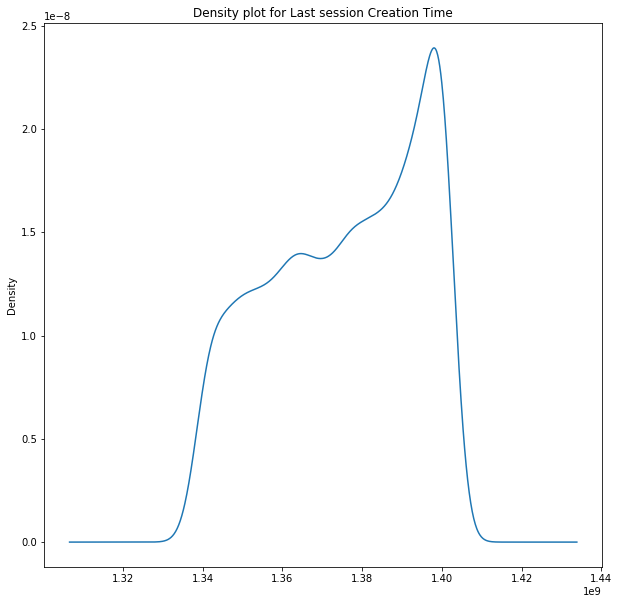

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
# Density plot for last_session_creation_time
fig, ax = plt.subplots(figsize=(10,10))
r = notadopt.last_session_creation_time
r.plot(kind='kde')

ax.set_title('Density plot for Last session Creation Time')

plt.show()

Since "Last Session Creation Time" is not a normal distribution, the median is used instead of mean to fill NaN values. 
Because all users with NaN values for "Last Session Creation Time" were also not "Adopted", the median value for non-adopted users is used to fill these NaN values

In [25]:
user.last_session_creation_time = user.last_session_creation_time.fillna(notadopt.last_session_creation_time.median())

In [26]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 11 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null object
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    12000 non-null float64
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            6417 non-null float64
adopted                       12000 non-null int32
dtypes: float64(2), int32(1), int64(4), object(4)
memory usage: 984.5+ KB


In [27]:
user['invited_by_user'] = np.where(user.invited_by_user_id.isnull(), 0, 1)

In [28]:
del user['invited_by_user_id']

## Feature Engineering

In [29]:
user.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,adopted,invited_by_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,0,1
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,1,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,0,1
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,0,1
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,0,1


### "object_id", "name", and "email" are all identification variables that will not help with a predictive model, so they are removed.

In [30]:
del user['object_id']
del user['name']
del user['email']

### "creation_time" cannot be used in the future to influence users behavior, so it will not be a useful feature for a predictive model.

In [31]:
del user['creation_time']

In [32]:
user.head()

,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,adopted,invited_by_user
0,GUEST_INVITE,1.398139e+09,1,0,11,0,1
1,ORG_INVITE,1.396238e+09,0,0,1,1,1
2,ORG_INVITE,1.363735e+09,0,0,94,0,1
3,GUEST_INVITE,1.369210e+09,0,0,1,0,1
4,GUEST_INVITE,1.358850e+09,0,0,193,0,1


In [33]:
user_numeric =pd.get_dummies(user, columns=['creation_source'])

In [34]:
user_numeric.head()

,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,adopted,invited_by_user,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
0,1.398139e+09,1,0,11,0,1,1,0,0,0,0
1,1.396238e+09,0,0,1,1,1,0,1,0,0,0
2,1.363735e+09,0,0,94,0,1,0,1,0,0,0
3,1.369210e+09,0,0,1,0,1,1,0,0,0,0
4,1.358850e+09,0,0,193,0,1,1,0,0,0,0


## Model Building

In [35]:
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
import sklearn.metrics
from sklearn.model_selection import train_test_split

#Supervised Learning Regressor algorithms
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [36]:
#create list of possible algorithms
models = []
models.append(('KNeighbor', KNeighborsClassifier(3)))
models.append(('Decision Tree', DecisionTreeClassifier(max_depth=5)))
models.append(('RF',RandomForestClassifier(n_jobs = -1, max_depth=5, n_estimators=10, max_features=1)))
models.append(('AdaBoost', AdaBoostClassifier()))
models.append(('Naive Bayes', GaussianNB()))
models.append(('QDA', QuadraticDiscriminantAnalysis()))
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('Neural Net', MLPClassifier(alpha=1)))

In [37]:
#create a function to evaluate each model
def run_models(x,y):
    results = []
    names = []

    for name, model in models:
        kfold = model_selection.KFold(n_splits=10, shuffle = True, random_state=11)
        cv_results = model_selection.cross_val_score(model, x, y, cv=kfold, scoring='accuracy')
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)

In [38]:
#separating target variable ("adopted")
Y = user_numeric.adopted
X = user_numeric.drop('adopted', axis=1)

In [39]:
#break data into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(X.values, Y.values, test_size = 0.3, random_state = 10)

In [40]:
run_models(xtrain,ytrain)

KNeighbor: 0.903333 (0.006999)
Decision Tree: 0.912619 (0.005933)
RF: 0.889048 (0.015438)
AdaBoost: 0.915595 (0.004437)
Naive Bayes: 0.856667 (0.008637)
QDA: 0.809405 (0.037262)


C:\Users\Lara\Miniconda3\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Lara\Miniconda3\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Lara\Miniconda3\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Lara\Miniconda3\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Lara\Miniconda3\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Lara\Miniconda3\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Lara\Miniconda3\lib\site-

LR: 0.856667 (0.008637)
LDA: 0.859881 (0.008717)


C:\Users\Lara\Miniconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\Lara\Miniconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\Lara\Miniconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\Lara\Miniconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\Lara\Miniconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\Lara\Miniconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\Lara\Minicond

Neural Net: 0.856667 (0.008637)


#### AdaBoost Classifier performs the best of all the algorithms

In [41]:
param_grid = {'n_estimators': [10, 50,100,500, 1000]}
kfold = model_selection.KFold(n_splits=10, shuffle = True, random_state=11)
ada= AdaBoostClassifier()
clf = GridSearchCV(ada, param_grid, n_jobs =-1, cv = kfold, scoring='accuracy')
clf.fit(xtrain, ytrain)
    
print (clf.best_estimator_)
print (clf.best_score_)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)
0.915595238095


In [42]:
model= AdaBoostClassifier(n_estimators=50)
model.fit(xtrain, ytrain)
print (model.score(xtrain, ytrain))

0.918333333333


In [43]:
model.score(xtest,ytest)

0.9194444444444444

## The Adaboost classification model fit to the training data performed with an accuracy rate of 91.94% on the testing data.

In [44]:
imp = model.feature_importances_ 

In [45]:
feat_import = pd.DataFrame()
feat_import['feature'] = X.columns
feat_import['Importance'] = imp
feat_import

,feature,Importance
0,last_session_creation_time,0.86
1,opted_in_to_mailing_list,0.00
2,enabled_for_marketing_drip,0.00
3,org_id,0.08
4,invited_by_user,0.00
5,creation_source_GUEST_INVITE,0.02
6,creation_source_ORG_INVITE,0.00
7,creation_source_PERSONAL_PROJECTS,0.02
8,creation_source_SIGNUP,0.02
9,creation_source_SIGNUP_GOOGLE_AUTH,0.00


## The feature found to be most highly predictive of "adoption" rate  with an importance level of 86% is "last_session_creation_time", which the unix timestamp of each user's last login.
## This makes sense as the more time that goes by since a user's last login would logically be correlated with whether that user logs in regularly. A user who has defected, or decided not to use the product will have an increasingly long time since their last session. 
## This model could be used to detect when a user's last login has reached a point that they may be at risk of defecting, at which point some kind of intervention could occur to encourage further use of the product. 